In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [311]:
data = pd.read_csv("mirror/08_gap-every-five-years.tsv", sep='\t')
data.head()
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Part 1

Exercise 1

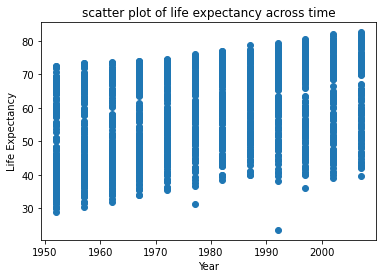

In [312]:
subdata = data[['year','lifeExp','continent']].sort_values(by=['year'])
x = subdata['year']
y = subdata['lifeExp']
plt.scatter(x,y)
plt.title('scatter plot of life expectancy across time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

Q1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

Ans: Yes, there is a general increasing positive trend, which means the life expectancy increases as time passes. It is approximately a linear trend.

In [313]:
Max_year = subdata['year'].max()
Min_year = subdata['year'].min()
life_exp_per_year = []
years = []
 
for y in range(Min_year,Max_year+1):
    col = []
    years.append(y)
    for x in range(0,len(subdata)):
        if subdata.iat[x,0] == y:
            col.append(subdata.iat[x,1])
    if col!=[]:
        life_exp_per_year.append(col)
    else:
        years.remove(y)

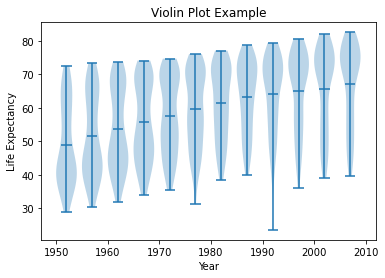

In [314]:
fig, ax = plt.subplots()

ax.violinplot(life_exp_per_year,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot Example")
fig.savefig("violin.png")

Q2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

Ans: For the first two distributions, they are right-skewed unimodal distributions and not symmetric around their centers. For the third, fourth and fifth distributions, they are skewed bimodal ditribution and they are not perfectly symmetric about their centers. For the rest ditributions, they are left-skewed unimodal ditribution and not symmetric around their centers. Overall, the distributions of life expectancy across countries for individual years are skewed, mostly unimodal and not symmetric.

Q3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?

Ans: Based on the Violin Plot, though there is not enough information indicating a relationship, there is a clear coorelation between those two variables. Thus, I would reject the null hypothesis.  

Q4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? 

Ans: It would be a linear distribution (a horizontal line) since the residuals are relatively same for a linear distribution.

Q5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

Ans: It should be a linear distribution centered around 0

Exercise 2

In [315]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [316]:
x = np.array(subdata['year']).reshape(-1, 1)
y = np.array(subdata['lifeExp'])

model = LinearRegression().fit(x, y) 
r_sq = model.score(x,y )
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_) 
print('Regression Line: y =  {} * x  {}'.format(model.coef_,model.intercept_))

Coefficient of determination: 0.18975713852188825
Intercept: -585.6521874415398
Slope: [0.32590383]
Regression Line: y =  [0.32590383] * x  -585.6521874415398


In [317]:
lm = sm.OLS.from_formula('lifeExp ~ year', subdata)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        23:13:19   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q6: On average, by how much does life expectancy increase every year around the world?

Ans: 0.32590383

Q7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

Ans: Yes, we reject the null hypothesis. The p-value is 7.55e-80 which is small enough to reject the null hypothesis

Exercise 3

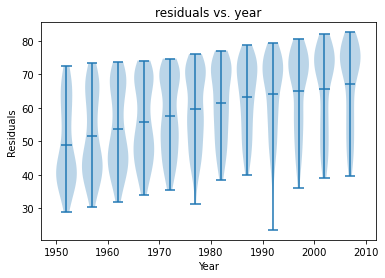

In [318]:
subdata['residuals'] = subdata['lifeExp'] - (model.coef_ * subdata['year'] + model.intercept_)
res_years = subdata['year']
residuals = []
for y in range(Min_year,Max_year+1):
    col = []
    for x in range(0,len(subdata)):
        if subdata.iat[x,0] == y:
            col.append(subdata.iat[x,1])
    if col!=[]:
        residuals.append(col)
        
fig, ax = plt.subplots()

ax.violinplot(residuals,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("residuals vs. year")
fig.savefig("violin2.png")

Q8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Ans: Yes, it matches. It is a relatively linear distribution (a horizontal line) since the residuals are relatively same for a linear distribution.

Excise 4

In [321]:
continent = data['continent'].unique()
residuals2 = []
for y in continent:
    col = []
    for x in range(0,len(subdata)):
        if subdata.iat[x,2] == y:
            col.append(subdata.iat[x,3])
    residuals2.append(col)


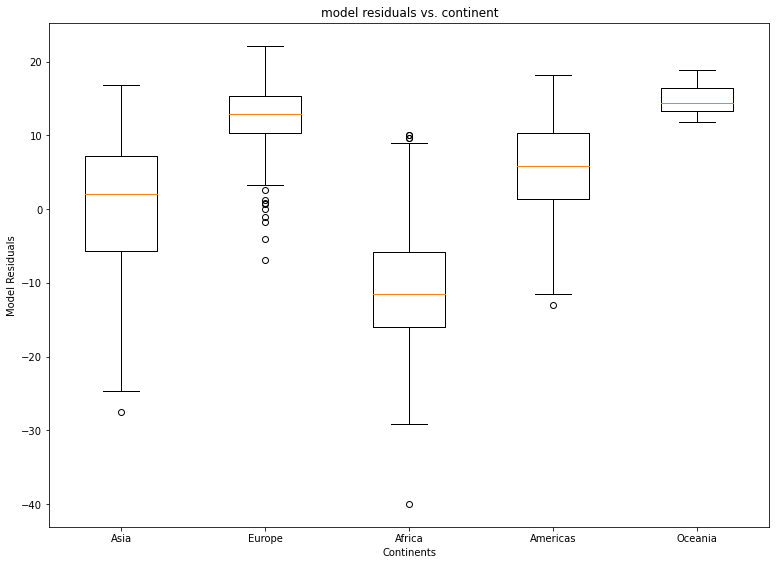

In [322]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(residuals2)
ax.set_xticklabels(continent)
plt.title("model residuals vs. continent")
plt.xlabel('Continents')
plt.ylabel('Model Residuals')
plt.show()

Q9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes, it seems there is a dependence between model residual and continent since for each continents, the connection betwwen residuals and continents are unclear and each boxgraph is separated and distinct. This suggests that we may need to separate each continents to perform a regression analysis of life expectancy across time.

Exercise 5:

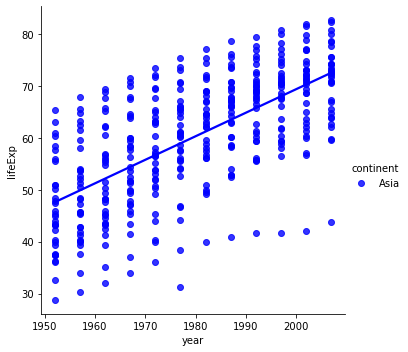

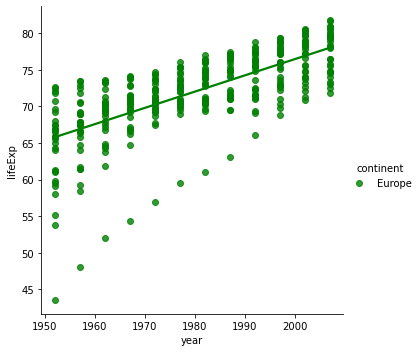

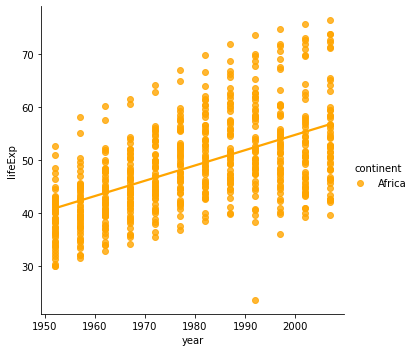

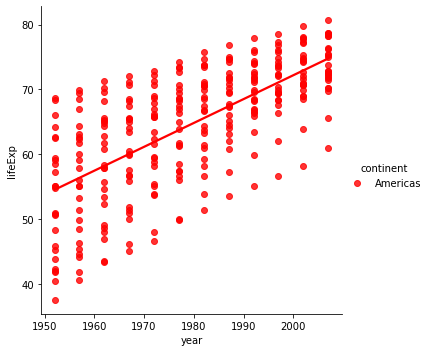

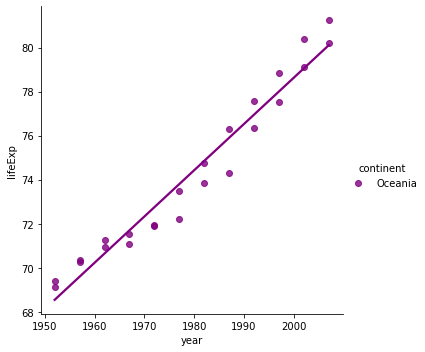

In [350]:
import seaborn as sns
  
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Oceania':'purple','Africa':'orange'}
for y in continent:
    newdata = data.loc[data['continent'] == y]
    sns.lmplot(x = "year",
            y = "lifeExp", 
            ci = None,
            data = newdata,
            hue = 'continent',
            scatter_kws={"color":colors[y]}, line_kws={"color": colors[y]})

Q10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Ans: Yes, an interaction term is needed since the slopes and intersections of those regression lines are too distinct. It means that including an interaction term for continent and year can make the regression more precise and correct.

Exercise 6

In [353]:
lm2 = sm.OLS.from_formula('lifeExp ~ year * continent', subdata)
result2 = lm2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:11:23   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q11: Are all parameters in the model significantly (in the p-value sense) different from zero? If not, which are not significantly different from zero?

Ans: Not all parameters are significantly different from zero. The Oceania is -0.916 which is close to zero.

Q12: On average, by how much does life expectancy increase each year for each continent? 

In [357]:
result2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

Ans: for Americas per year: increase 0.078122; for Oceania per year: increase -0.079257; for Asia per year: increase 0.163593; for Europe per year: increase -0.067597; for Africa per year: increase 0.289529

Exercise 7:

In [372]:
subdata['prediction'] = result2.predict()
subdata['residuals2'] = subdata['lifeExp'] - subdata['prediction']

residuals2 = []
for y in years:
    col = []
    for x in range(0,len(subdata)):
        if subdata.iat[x,0] == y:
            col.append(subdata.iat[x,5])
    if col!=[]:
        residuals2.append(col)

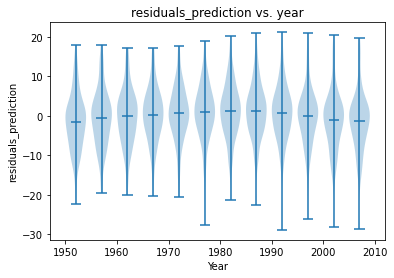

In [374]:
fig, ax = plt.subplots()

ax.violinplot(residuals2,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("residuals_prediction")
ax.set_title("residuals_prediction vs. year")
fig.savefig("violin4.png")

Comments: It fits the assumption that it would be normally distributed because those distributions are unimodal, normal and centered around zero.

Part2

In [525]:
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [526]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [527]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['species']

Linear Discriminant Analysis 

In [528]:
clf1 = LinearDiscriminantAnalysis()
clf1 = clf1.fit(X.values, y.values)

Decision trees

In [529]:
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X.values, y.values)

10-fold cross-validation

In [530]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [533]:
kfold = model_selection.KFold(n_splits=10, random_state=100,shuffle=True)
model_kfold = LinearDiscriminantAnalysis()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("%0.2f accuracy with a standard deviation of %0.2f" % (results_kfold.mean(), results_kfold.std()))


0.98 accuracy with a standard deviation of 0.04


In [536]:
kfold = model_selection.KFold(n_splits=10, random_state=100,shuffle=True)
model_kfold = DecisionTreeClassifier ()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("%0.2f accuracy with a standard deviation of %0.2f" % (results_kfold.mean(), results_kfold.std()))

0.95 accuracy with a standard deviation of 0.06


WriteUp: For Part 2, I choose Iris dataset. I load the data using load_iris() from the sklearn.datasets.module. The prediction is classification of types of iris. There are three expected outcomes: setosa, versicolour and virginica. The predictors are sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'. 

Then I make my data as a dataframe(code is above). I let X be the predictors and y be the classification.  Then using Linear Discriminant Analysis and Decision trees algorithm(code is above). For Decision trees, I use the 'DecisionTreeClassifier ()'. As for performance metric, I use 10-fold cross-validation to get each algrithm's accuracy and std div.

I first the 'model_selection.KFold' function from 'scikit-learn' and creates 10 folds. Models are LinearDiscriminantAnalysis() and DecisionTreeClassifier(). Then I fit the model and generates cross-validation scores. The 'cv' argument specifies the number of cross-validation splits. At last, print the mean accuracy result and std div.

 For Linear Discriminant Analysis, 0.98 accuracy with a standard deviation of 0.04. For Decision trees, 0.95 accuracy with a standard deviation of 0.06.
 Standard arror = SE = SD/√(sample size). Thus, for Decision trees, SE = 0.005. For LDA, SE = 0.003. Thus, Linear Discriminant Analysis is better because of higher accuracy and lower SE.
    
   